<a href="https://colab.research.google.com/github/zeyyildm/CNN-Deep-Learning/blob/main/CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aynı temel CNN mimarisini koruyarak 2 farklı varyasyon elde etmemiz bekleniyor. Birinde modeli hafifletip birinde modeli güçlendireceğim.

Maliyet: Parametre sayısı, eğitim süresi, işlem yükü
Performans: Test accuracy, loss, val accuracy

Basit CNN mimarimiz:
Conv2D - Pool - Conv - Pool - Flatten - Dense - Output
Conv Katmanı: Görüntünün küçük parçalarına bakar. ANN'de piksel piksel bakılırken CNN'de komşuları kimdir diye de bakarız.
Max Pooling: Özellik haritasını küçültür. Ne önemli ne önemsiz.
2. Conv Katmanı: Daha anlamlı özellikler. Kenarları biliyorum şekilleri nedir?
2. Pool: Görüntü çok küçük ama anlamlı (Özetle, sadeleştir)
Flatten: 2D mapi 1D vektöre çevirir
Dense: Yorumlama
Projede bu halkada değişiklik yapınca ne olacağını inceleyeceğim.

In [1]:
#gerekli importlar
import numpy as np #sayısal işlemler için
import pandas as pd #sonuçları tablo halinde görmek için
import tensorflow as tf #dl yapısı için ana kütüphanemiz
import time #eğitim süresini ölçmek için

from tensorflow.keras.models import Sequential #modeli katman katman kurmak için
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
#dataset yükleme
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#mnist verileri 0-255 arasında gelen her sayı bir int derin öğrenme float değerlerle olur
# /255 ile verileri 0.0-1.0 arasına çekiyorum
#normalize etme
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

#conv2d katmanı veriyi: batch, height, width, channels şeklinde ister. MNIST dataset içinde channel bilgisi yoktur.
#channel = görüntünün kaç kanaldan oluştuğu. bir renkli fotoğraf aslında 3 kanaldan oluşur red, green , blue
#mnist ise siyah beyazdan oluşuyor. burada renk yok parlaklık var. tek channel. mnist bize bu bilgiyi vermiyor ama conv2d katmanı bu bilgiyi istiyor.
#ann channel bilgisini umursamaz. her şey düz tek bir liste gibi görüyor.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

#one hot encoding
#vektör haline getiriyoruz. label'a göre doğru sınıfa 1 diğerlerine 0 verir
num_classes = 10 #0-9 arası rakamlar için 10 sınıf vardır
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot  = tf.keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


x_train = eğitim görüntüleri
y_train = eğitim görüntülerinin etiketleri
x_test = test görüntüleri
y_test = test görüntülerinin doğru etiketleri
one hot sonrası "0" etiketi -> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
#basit cnn mimarisi kurma
cnn_basic = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)), #görüntüye ilk bakan katman. görüntünün yapısını öğrenir. 32 filtre var her filtre başka bir şeyi öğrenir.
    #(3,3) filtrenin baktığı pencere boyutu
    #relu: negatifleri siler. bir anahtar gibi çalışır. özellik yoksa 0
    MaxPooling2D((2,2)), #her 2*2 görüntüden en büyük değeri alır. değer = bu bölgede özllik güçlü mü değil mi

    Conv2D(64, (3,3), activation='relu'), #kenarldan şekil oluşturuyor. 64 filtre daha karmaşık özellikler
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') #softmax olasılık üretir
])

cnn_basic.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

tablo yorumu:
conv2D: 32 özellik çıkarmış az parametre ile
pooling: öğrenme yapmaz sadece boyut küçültür
conv2d: daha derin.
pooling: görüntü artık çok küçük ama anlamlı
flatten: model artık karar süreci
dense: parametrelerin çoğu burada. modelin hesaplama maliyetinin çoğu bu katmandan geliyor.
dnse2: sınıflandırma için maliyet az
total parametre: modein öğrenmesi gereken toplam ağırlık sayısı. bu sayı = maliyet
CNN az parametre ile ilişkili özellikleri öğrenebiliyor.
Tabloya baktığımızda Dense 1 maliyetinin çok fazla olduğu conv ise çok verimli olduğunu görüyoruz buna göre varyasyon yapacağım.

In [8]:
#basit cnn modeli çalıştırma
cnn_basic.compile(
    optimizer="adam", #modelin ağırlıklarının nasıl güncelleneceğine karar verir
    loss="categorical_crossentropy", #hatayı ölçer
    metrics=["accuracy"]
)
start = time.time()

#model eğitimi
history_basic = cnn_basic.fit(
    x_train, y_train_one_hot,
    epochs=10, #model tüm eğitim verisini 10 kere görsün
    batch_size=32,
    validation_split=0.2,   #x_trainden %20 sini doğrulama için ayırır
    verbose=1 #süreyi yazdırır
)

train_time_basic = time.time() - start
print(f"Basit CNN eğitim süresi (sn): {train_time_basic:.2f}")

loss_basic, acc_basic = cnn_basic.evaluate(x_test, y_test_one_hot, verbose=0) #modelin test performansını ölçer.

print(f"Basit CNN Test Loss: {loss_basic:.4f}") #ne kadar yanlış
print(f"Basit CNN Test Accuracy: {acc_basic:.4f}") #ne kadar doğru

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9979 - loss: 0.0060 - val_accuracy: 0.9869 - val_loss: 0.0686
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9978 - loss: 0.0053 - val_accuracy: 0.9903 - val_loss: 0.0534
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9898 - val_loss: 0.0541
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9908 - val_loss: 0.0514
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9912 - val_loss: 0.0521
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9872 - val_loss: 0.0704
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9902 - val_loss: 0.0645
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9990 -

In [10]:
#basic cnn için sonuç tablosu

basic_result = {
    "Model": "CNN Basic (Reference)",
    "Params": cnn_basic.count_params(),
    "Train_Time_sec": round(train_time_basic, 2),
    "Test_Acc": round(float(acc_basic), 4),
    "Test_Loss": round(float(loss_basic), 4)
}

basic_result


{'Model': 'CNN Basic (Reference)',
 'Params': 225034,
 'Train_Time_sec': 555.87,
 'Test_Acc': 0.9886,
 'Test_Loss': 0.0645}

In [11]:
#VARYASYON 1
#maliyeti düşürerek performans gözlemi
#maliyetin büyük çoğunluğu dense1 den geliyordu

#filtreleri azalttık.

cnn_v1 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)), #(32'den 16'ya düştü)
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'), #(64'ten 32'ye düştü)
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_v1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#VARYASYON 1 İÇİN EĞİTİM

cnn_v1.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

start = time.time()

history_v1 = cnn_v1.fit(
    x_train, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

train_time_v1 = time.time() - start
loss_v1, acc_v1 = cnn_v1.evaluate(x_test, y_test_one_hot, verbose=0)

#val1 için sonuç tablosu
v1_result = {
    "Model": "CNN V1 (Filters 16/32)",
    "Params": cnn_v1.count_params(),
    "Train_Time_sec": round(train_time_v1, 2),
    "Test_Acc": round(float(acc_v1), 4),
    "Test_Loss": round(float(loss_v1), 4)
}

v1_result

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8910 - loss: 0.3635 - val_accuracy: 0.9834 - val_loss: 0.0611
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9831 - loss: 0.0559 - val_accuracy: 0.9869 - val_loss: 0.0470
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9872 - loss: 0.0386 - val_accuracy: 0.9871 - val_loss: 0.0465
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.9878 - val_loss: 0.0438
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9895 - val_loss: 0.0421
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9876 - val_loss: 0.0461
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9972 -

{'Model': 'CNN V1 (Filters 16/32)',
 'Params': 108618,
 'Train_Time_sec': 290.08,
 'Test_Acc': 0.9902,
 'Test_Loss': 0.0419}

In [13]:
#VARYASYON 2
#ekstra conv2d katmanı eklyerek performansı gözlemleme
cnn_v2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),   # 👈 ekstra Conv (TEK DEĞİŞİKLİK)
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_v2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,282 (915.16 KB)

 Trainable params: 234,282 (915.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#VARYASYON 2 için eğitim

cnn_v2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

start = time.time()

history_v2 = cnn_v2.fit(
    x_train, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

train_time_v2 = time.time() - start

loss_v2, acc_v2 = cnn_v2.evaluate(x_test, y_test_one_hot, verbose=0)

v2_result = {
    "Model": "CNN V2 (Deeper CNN)",
    "Params": cnn_v2.count_params(),
    "Train_Time_sec": round(train_time_v2, 2),
    "Test_Acc": round(float(acc_v2), 4),
    "Test_Loss": round(float(loss_v2), 4)
}

v2_result


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 99s 64ms/step - accuracy: 0.9008 - loss: 0.3106 - val_accuracy: 0.9847 - val_loss: 0.0481
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 61ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9846 - val_loss: 0.0517
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9903 - val_loss: 0.0337
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9905 - val_loss: 0.0343
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 96s 64ms/step - accuracy: 0.9951 - loss: 0.0140 - val_accuracy: 0.9909 - val_loss: 0.0361
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 60ms/step - accuracy: 0.9960 - loss: 0.0110 - val_accuracy: 0.9898 - val_loss: 0.0432
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9914 - val_loss: 0.0381
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9

{'Model': 'CNN V2 (Deeper CNN)',
 'Params': 234282,
 'Train_Time_sec': 1172.1,
 'Test_Acc': 0.9915,
 'Test_Loss': 0.0403}

In [16]:
results = [
    {
        "Model": "CNN Basic (Reference)",
        "Params": 225034,
        "Train Time (sec)": 555.87,
        "Test Accuracy": 0.9886
    },
    {
        "Model": "CNN V1 (Filters 16/32)",
        "Params": 108618,
        "Train Time (sec)": round(train_time_v1, 2),
        "Test Accuracy": round(acc_v1, 4)
    },
    {
        "Model": "CNN V2 (Deeper CNN)",
        "Params": 234282,
        "Train Time (sec)": 1172.10,
        "Test Accuracy": 0.9915
    }
]

df_results["Test Accuracy (%)"] = (df_results["Test Accuracy"] * 100).round(2)
df_results



,Model,Params,Train Time (sec),Test Accuracy,Test Accuracy (%)
0,CNN Basic (Reference),225034,555.87,0.9886,98.86
1,CNN V1 (Filters 16/32),108618,290.08,0.9902,99.02
2,CNN V2 (Deeper CNN),234282,1172.10,0.9915,99.15


<Axes: title={'center': 'Model Bazlı Parametre Sayısı'}, xlabel='Model'>

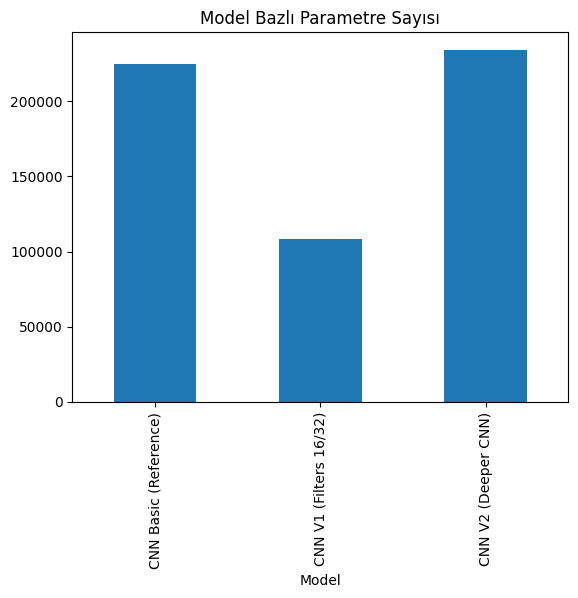

In [17]:
df_results.plot(
    x="Model",
    y="Params",
    kind="bar",
    title="Model Bazlı Parametre Sayısı",
    legend=False
)


<Axes: title={'center': 'Model Bazlı Test Accuracy (%)'}, xlabel='Model'>

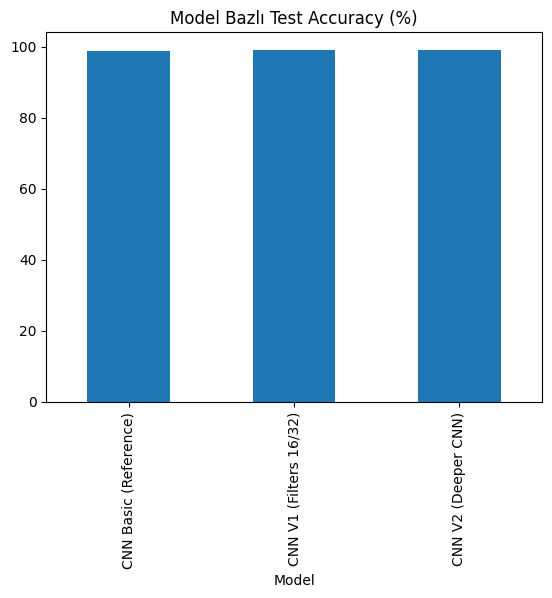

In [18]:
df_results.plot(
    x="Model",
    y="Test Accuracy (%)",
    kind="bar",
    title="Model Bazlı Test Accuracy (%)",
    legend=False
)


<Axes: title={'center': 'Model Bazlı Eğitim Süresi (sn)'}, xlabel='Model'>

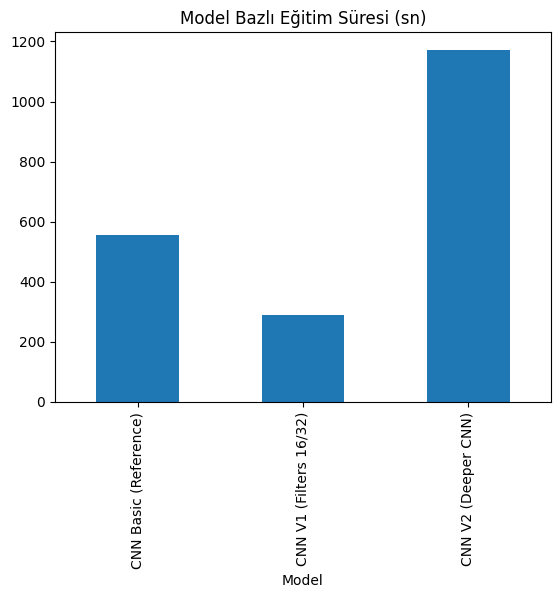

In [19]:
df_results.plot(
    x="Model",
    y="Train Time (sec)",
    kind="bar",
    title="Model Bazlı Eğitim Süresi (sn)",
    legend=False
)
